In [2]:
import foolbox as fb
import torch
import torchvision

In [3]:
torch.__version__, torch.cuda.is_available()

('1.12.0+cu102', True)

In [4]:
model = torchvision.models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')
model = model.eval()

In [5]:
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3)
bounds = (0, 1)
fmodel = fb.PyTorchModel(model, bounds=bounds, preprocessing=preprocessing)

In [6]:
fmodel = fmodel.transform_bounds((0, 1))

In [7]:
assert fmodel.bounds == (0, 1)

In [8]:
images, labels = fb.utils.samples(fmodel, dataset='imagenet', batchsize=8)

In [22]:
fb.utils.accuracy(fmodel, images, labels)

0.875

In [11]:
type(images), images.shape

(torch.Tensor, torch.Size([8, 3, 224, 224]))

In [12]:
attack = fb.attacks.LinfDeepFoolAttack()

In [13]:
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

In [23]:
is_adv

tensor([True, True, True, True, True, True, True, True], device='cuda:0')

In [24]:
labels

tensor([243, 559, 438, 990, 949, 853, 609, 609], device='cuda:0')

In [25]:
target_classes = (labels + 200) % 1000

In [26]:
target_classes

tensor([443, 759, 638, 190, 149,  53, 809, 809], device='cuda:0')

In [27]:
criterion = fb.criteria.TargetedMisclassification(target_classes)

In [28]:
attack = fb.attacks.L2CarliniWagnerAttack(steps=100)

In [29]:
epsilons = None

In [30]:
advs, _, is_adv = attack(fmodel, images, criterion, epsilons=epsilons)

In [31]:
is_adv

tensor([True, True, True, True, True, True, True, True], device='cuda:0')

In [32]:
fb.distances.l2(images, advs)

tensor([0.8982, 0.9787, 0.5469, 0.8635, 0.7121, 1.4742, 0.5181, 0.7975],
       device='cuda:0')

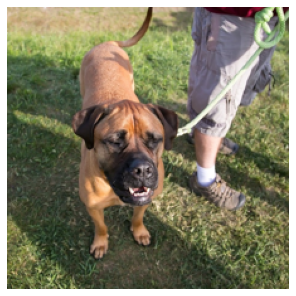

In [33]:
fb.plot.images(images[0:1],scale=4.)

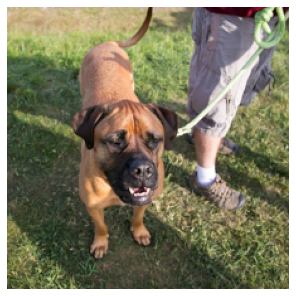

In [34]:
fb.plot.images(advs[0:1],scale=4.)

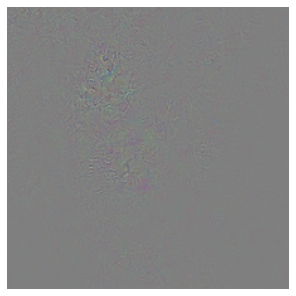

In [35]:
fb.plot.images(advs - images, n=1, bounds=(-0.1, 0.1), scale=4.)